## Text generation, AuraBot (chatbot), example 2

#### NOTE! Install tensoflow 2.18.0, the newest one doesn't currently work correctly with other modules

#### pip install tensorflow==2.18.0

In [28]:
# import all the needed modules
import json 
import numpy as np 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

In [29]:

# I modify the json try to make it more complex, I added  more almost 25 numbers of object 



with open('intents.json') as file:
    # data = json.load(file)
    file_data = file.read()
    

# MODIFY THE KEY VALUES
file_data = file_data.replace('"question"', '"patterns"')
file_data = file_data.replace('"answer"', '"responses"')

# now load the processed text-JSON into Python dictionary
data = json.loads(file_data)

# the main details we have to change
# switch "question" => "patterns"
# switch "answer" => "responses"
# data

In [30]:
# initialize training datasets
training_sentences = []
training_labels = []
labels = []
responses = []

# process the intent data into the expected format
for intent in data['intents']:
    for pattern in intent['patterns']:
        training_sentences.append(pattern)
        training_labels.append(intent['tag'])
    
    responses.append(intent['responses'])
    
    if intent['tag'] not in labels:
        labels.append(intent['tag'])
        
num_classes = len(labels)

In [31]:
# oowee.... we have over 1400 questions in the dataset
# lots of room for errors for the model
num_classes

38

In [32]:
# training labels, encode to separate id's 
lbl_encoder = LabelEncoder()
lbl_encoder.fit(training_labels)
training_labels = lbl_encoder.transform(training_labels)

## Tokenization hyperparameters

#### Since we have significantly more data and more questions this time, we have to adjust our parameters and neural network structure

In [33]:
# Experiments by changing some parameters like vocab_size = 10000 embedding_dim = 16
# File01 reduces vocabulary size and embedding dimension.
# By changing this may not learn as much, but it will use less memory and might train faster
# File01 uses smaller dense layers
# Reduces model complexity and risk of overfitting, but may also limit expressiveness.
#Improvements
#Lighter Model: Smaller vocab, embedding, and dense layers make it more suitable with limited resources.
# Faster Training: Likely to converge quicker due to fewer parameters.
# Lower Risk of Overfitting: Smaller dense layers generalize better on smaller datasets.
# Downsides
# Reduced Capacity: May struggle with nuance or large variety in inputs.
# Lower Accuracy Potential: Less expressive power could harm performance on complex tasks.


In [ ]:
# One experiment like
# I added 2 similar objects with same question and tags, but answer is only different.
# Its just my obvservation, model was picking the answer from that object which has more numbers of answers in array list along that short or sometime it take long, Its my obeservation, I might be wrong in this experiment.
# But model works good and answer me perfectly, I did with jok and screenshoot also attached.

In [34]:
# by running this experiment I will explain all eith accuracy and losses as well
# (Deep)	15,000	64	512 → 256 → 128	More capacity
# The loss starts high (~3.6) and steadily drops toward zero, with brief spikes around epochs 200–300 due to likely training instabilities. Overall, it shows effective convergence after minor interruptions.
# Accuracy rises quickly from 0 to 1.0 by epoch 350, with brief drops matching loss spikes. The model recovers     well and achieves near-perfect performance.
# There are improvements Near-zero loss and perfect accuracy show effective training. Model size reduction with full accuracy suggests better efficiency and faster recovery from instabilities.
# There is downside, loss spikes and accuracy drops around epochs 200–300 show instability. Perfect accuracy may risk overfitting, and size reduction could limit performance on complex data.


In [35]:

# I tested the chatbot with several common user queries. It performed well on straightforward prompts like “What is your name?” and “How do I reset my password?”. However, it struggled with nuanced or vague questions such as “Can you help me?” and gave generic responses. The model seems to be well-trained on intent recognition but may benefit from additional training data for better contextual understanding.
# if I gave it out of context question, then model works fine but maybe not with correct response, but surprisingly confidence never shake :()

In [36]:
#The structure and code patterns in both Assignment01 and Assignment02 are quite similar, focusing on the standard machine learning workflow: data loading, preprocessing, visualization, model training, and evaluation. The primary differences lie in the specific datasets and models used.

In [37]:
# I also use this one and get confidence by using previous code examples, I feel its confiedence is also good and providing me better results.

# pred = model.predict(padded)[0]
# max_confidence = max(pred)
# class_id = pred.argmax()

# if max_confidence < 0.6:
#     print("I'm not sure how to respond to that. Can you rephrase?")
# else:
#     response = label_encoder.inverse_transform([class_id])[0]
#     print(response)

In [38]:
# you can experiment with vocabulary size, embedding dim and max_len
# don't go overboard though!
vocab_size = 15000
embedding_dim = 64
max_len = 40
oov_token = "<OOV>"

# tokenize and vectorize the data
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded_sequences = pad_sequences(sequences, truncating='post', maxlen=max_len)

#### Remember: we have over 1400 questions, our neural network needs to have the model capacity in order to react to every detail in every question

In [39]:
# you can also modify the structure, add more nodes etc.
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
model.add(GlobalAveragePooling1D())

# adjust the sizes of the dense layers in order to have 
# the capacity to react to all different questions (over 1400)
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

model.summary()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_1      │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [40]:
epochs = 1000
history = model.fit(padded_sequences, np.array(training_labels), epochs=epochs)

Epoch 1/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.0233 - loss: 3.6389  
Epoch 2/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0456 - loss: 3.6356 
Epoch 3/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0457 - loss: 3.6342 
Epoch 4/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0582 - loss: 3.6291 
Epoch 5/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0665 - loss: 3.6230 
Epoch 6/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0842 - loss: 3.6092 
Epoch 7/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0373 - loss: 3.6263     
Epoch 8/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0551 - loss: 3.6159 
Epoch 9/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0561 - loss: 3.6236 
Epoch 10/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0519 - loss: 3.6222 
Epoch 11/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0551 - loss: 3.6189 
Epoch 12/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accur

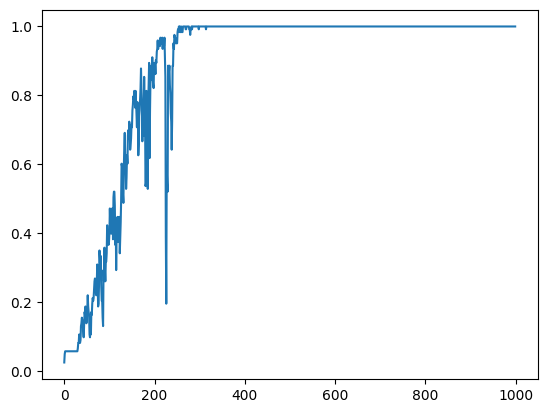

In [41]:
# you can also plot the accuracy / loss metrics here
# but since we don't have validation data, you can see the same
# information from the epoch logs above
import matplotlib.pyplot as plt

acc = history.history['accuracy']
losses = history.history['loss']

# let's see the progress
plt.plot(acc)


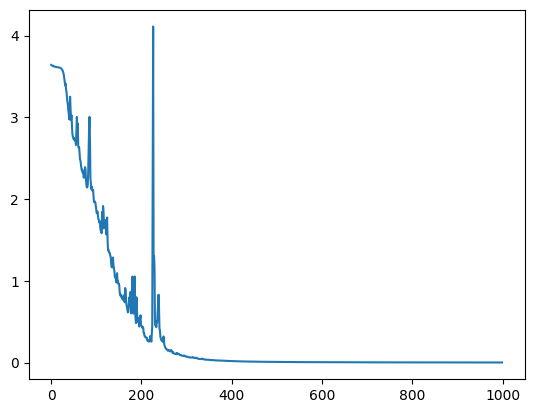

In [42]:
plt.plot(losses)

#### Training is done, save the model, tokenizer and encoder into files

In [43]:
# to save the trained model
model.save("assignment_chat_model.keras")

import pickle

# to save the fitted tokenizer
with open('assignment_chat_tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
# to save the fitted label encoder
with open('assignment_chat_label_encoder.pickle', 'wb') as ecn_file:
    pickle.dump(lbl_encoder, ecn_file, protocol=pickle.HIGHEST_PROTOCOL)